## Implementation using BOWs

### BOWs representation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
df = pd.read_csv('train.tsv',sep='\t')
df.head()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,"
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health"
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer"
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health"
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,


In [3]:
df = df[['claim','main_text','label']]
df.isna().sum()

,0
claim,8
main_text,26
label,27


In [4]:
df.dropna(axis=0,inplace =True)
df['main_text'].value_counts()

,count
main_text,
"Doctors in India have been successful in treating coronavirus with a combination of drugs (Lopinavir, Retonovir, Oseltamivir along with Chlorphenamine) and are going to suggest the same medicine globally. India’s ministry of health has advised that the anti-HIV drugs, Lopinavir and Retonovir, are used in some groups of Covid-19 patients. But it is unclear how successful this treatment has been. The other two drugs from the claim are not mentioned in their guidance. Researchers at the Erasmus Medical Center claim to have found an antibody against coronavirus. Researchers in the Netherlands have released research, which has not yet been peer-reviewed, on an antibody against the new coronavirus. A 103 year-old Chinese grandmother has made a full recovery from Covid-19 after being treated for 6 days in Wuhan, China This has been widely reported in the media. Apple has reopened all 42 China stores. Correct. On 13 March 2020, Apple announced that it had reopened all 42 stores in mainland China after a closure of almost six weeks. Cleveland Clinic developed a Covid-19 test that gives results in hours, not days. The number of new cases in South Korea is declining. Italy is hit hard, experts say, only because they have the oldest population in Europe. Whilst it is true that an older population has contributed to a high number of deaths in Italy, it may not be the sole reason. Scientists in Israel are likely to announce the development of a coronavirus vaccine. Scientists in Israel and elsewhere are working on developing a vaccination to prevent the spread of the new coronavirus, but it won’t be ready for the public for over a year. Three Maryland coronavirus patients fully recovered and are able to return to everyday life. Correct. On 13 March 2020, Montgomery County, Maryland confirmed that three residents who previously had the virus no longer tested positive. A network of Canadian scientists are making excellent progress in Covid-19 research. At least one group of Canadian scientists has recently announced some progress in understanding Covid-19. A San Diego biotech company is developing a Covid-19 vaccine in collaboration with Duke University and National University of Singapore. Tulsa County's first positive Covid-19 case has recovered. This individual has had two negative tests, which is the indicator of recovery. Correct, this patient has recovered according to official Tulsa County sources. Two negative tests is one of three official indicators of recovery among people with Covid-19 (who showed symptoms). All seven patients who were getting treated for Covid-19 at Safdarjung hospital in New Delhi have recovered. There is a news story reporting that seven patients in this hospital in New Delhi had recovered. However, these were not the only Covid-19 patients in the city. Plasma from newly recovered patients from Covid -19 can treat others infected by Covid-19. This is being used as a treatment in some countries, but clinical trials have not yet proved that this is effective. Claim 1 of 15",12
"There are 16,481 fewer beds in hospitals since 2010. This is in the right ballpark, but it doesn’t seem to be the best comparison. It seems to compare the number of beds at different times of the year, but the number available fluctuates seasonally. Comparing July-September in 2010 and 2017, the decrease in beds available overnight in England is closer to 13,200. 66 A&E and maternity wards have been closed. We don’t know, as this information isn’t collected nationally. In 2014, there were reportedly plans to close or downgrade 66 in England, but while some have been, others have stayed open. 103 NHS walk-in centres have closed or been downgraded since 2010. We don’t know exactly, as this information isn’t collected centrally. Research from an NHS regulator and from campaign group 38 Degrees suggests more than 90 have been closed or downgraded. 60 ambulance stations have closed since 2010. We don’t know how many ambulance

In [5]:
# preprocessing

stop_words = set(stopwords.words('english'))

df['main_text'] = df['main_text'].apply(lambda x: re.sub(r'[#\\\"$”“,:()–’\'/;\[\]{}—‘!+•%&-]', ' ', x))
df['main_text'] = df['main_text'].apply(lambda x: re.sub(r'\s+', ' ', x))
df['main_text'] = df['main_text'].apply(lambda x: x.lower())
df['main_text'] = df['main_text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

df['claim'] = df['claim'].apply(lambda x: re.sub(r'[#\\\"$”“,:()–’\'/;\[\]{}—‘!+•%&-]',' ',x))
df['claim'] = df['claim'].apply(lambda x: re.sub(r'\s+',' ',x))
df['claim'] = df['claim'].apply(lambda x: x.lower())
df['claim'] = df['claim'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))


In [6]:
df.head()

,claim,main_text,label
0,money clinton foundation took foreign governme...,hillary clinton political crosshairs author ne...,false
1,annual mammograms may false positives,financial costs screening mammography false po...,mixture
2,sbrt offers prostate cancer patients high canc...,news release quotes lead researcher robert mei...,mixture
3,study vaccine breast ovarian cancer potential,story discuss costs framing problematic . stor...,true
4,appendicitis cases may require emergency surgery,although story cite cost appendectomy emergenc...,true


In [7]:
df['label'].value_counts()

,count
label,
true,5078
false,3001
mixture,1434
unproven,291
snopes,1


In [8]:
df1 = df[~df['label'].isin(['snopes'])]
df1.shape,df.shape

((9804, 3), (9805, 3))

In [9]:
n = len(set(df1['main_text']))
corpus = list(set(df1['main_text']))+list(set(df1['claim'])) # corpus to fit the vectorizer on
len(corpus)

19385

In [10]:
# BOWs

from sklearn.feature_extraction.text import CountVectorizer # inbuilt function for BOWs

vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus)
len(vectorizer.get_feature_names_out())
#vectorizer.vocabulary_

5000

In [11]:
doc_feat = vectorizer.transform(list(df1['main_text'])).toarray()
claim_feat = vectorizer.transform(list(df1['claim'])).toarray()
train_labels = df1['label']
# Map string labels to integers
label_mapping = {'true': 0, 'false': 1, 'mixture': 2,'unproven':3}
train_labels = train_labels.map(label_mapping)
train_labels.value_counts()

,count
label,
0,5078
1,3001
2,1434
3,291


In [12]:
train_feat = np.hstack([doc_feat,claim_feat])
train_feat.shape

(9804, 10000)

### Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,  recall_score

x_train = train_feat
y_train = train_labels

logitmodel = LogisticRegression(random_state=42)
logitmodel.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [14]:
# testing

df3 = pd.read_csv('test.tsv',sep='\t')
df3 = df3[['claim','main_text','label']]
df3.dropna(axis=0,inplace=True)
df3=df3[~df3['label'].isin(['snopes'])]

doc_feat = vectorizer.transform(list(df3['main_text'])).toarray()
claim_feat = vectorizer.transform(list(df3['claim'])).toarray()
test_labels = df3['label']
# Map string labels to integers
label_mapping = {'true': 0, 'false': 1, 'mixture': 2,'unproven':3}
test_labels = test_labels.map(label_mapping)

test_feat = np.hstack([doc_feat,claim_feat])
predictions = logitmodel.predict(test_feat)
predictions

array([3, 0, 3, ..., 3, 0, 3])

In [15]:
accuracy = accuracy_score(test_labels, predictions)
macro_precision = precision_score(test_labels, predictions, average='macro')
macro_recall = recall_score(test_labels, predictions, average='macro')
f1 = f1_score(test_labels, predictions, average='weighted')

metrics = ['Accuracy', 'Macro Precision', 'Macro Recall', 'F1 Score']
values = [accuracy, macro_precision, macro_recall, f1]
fig = px.bar(x=metrics, y=values, text=np.round(values, 4),
             labels={'x': 'Metrics', 'y': 'Values'},
             title='Evaluation Metrics',
             template='plotly_white',
              color=values,
             color_continuous_scale='Viridis',
              color_continuous_midpoint=None
             )

fig.update_layout(yaxis=dict(range=[0, 1]))

fig.show()

Text(34.472222222222214, 0.5, 'Predicted Label')

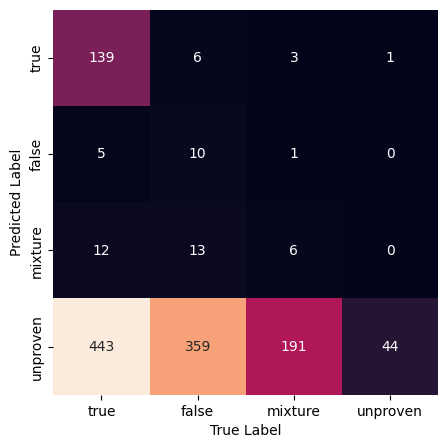

In [16]:

class_labels = ['true','false','mixture','unproven']
mat = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### Simple neural network

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch import optim
import torch.nn.functional as F

train_feat = torch.tensor(train_feat,dtype=torch.float32)
train_labels = torch.tensor(train_labels,dtype=torch.long)
train_dataset = TensorDataset(train_feat,train_labels)
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
train_feat.shape[1]

10000

In [18]:
# simple neural network
class bow_snn(nn.Module):
    def __init__(self):
        super(bow_snn,self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(10000,100),
            nn.ReLU(),
            nn.Linear(100,50),
            nn.ReLU(),
            nn.Linear(50,25),
            nn.ReLU(),
            nn.Linear(25,4),
            nn.Softmax(dim=1)
        )

    def forward(self,x):
        prob = self.layers(x)
        return prob

    def loss_fn(self,y,y_pred):
        log_pred = torch.log(y_pred+1e-8)
        loss = -(log_pred*y).sum(1).mean()
        return loss

model=bow_snn()

In [19]:
lr = 0.001 # this is our base learning rate
epochs = 50

optimizer = optim.Adam(model.parameters(), lr=lr)

# set model to training mode
model.train()

for epoch in range(epochs):
    for x_batch, y_batch in train_loader:

        y_batch = F.one_hot(y_batch, num_classes=4) # turn digit labels into one-hot vectors 5 -> (0,0,0,0,0,1,0,0,0,0)
        y_pred = model(x_batch) # this is from our forward function
        #print(f'y_batch :{y_batch},y_pred :{y_pred}')
        loss = model.loss_fn(y_batch, y_pred)

        loss.backward() # calculates the gradients using backpropogation
        optimizer.step() # take a gradient step for our parameters
        optimizer.zero_grad() # set gradients back to zero

    if epoch % 10 == 0:
        print('epoch: ', epoch, 'loss:', f"{loss.item():.3}")

epoch:  0 loss: 0.838
epoch:  10 loss: 0.555
epoch:  20 loss: 0.0592
epoch:  30 loss: 0.000236
epoch:  40 loss: 5.86e-06


In [20]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
test_feat = torch.tensor(test_feat,dtype=torch.float32)
test_labels = torch.tensor(test_labels,dtype=torch.long)
model.eval()
with torch.no_grad():
    predictions = model(test_feat)
#predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = np.argmax(predictions.detach().numpy(), axis=1)

In [22]:
accuracy = accuracy_score(test_labels, predicted_labels)
macro_precision = precision_score(test_labels, predicted_labels, average='macro')
macro_recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

metrics = ['Accuracy', 'Macro Precision', 'Macro Recall', 'F1 Score']
values = [accuracy, macro_precision, macro_recall, f1]
fig = px.bar(x=metrics, y=values, text=np.round(values, 4),
             labels={'x': 'Metrics', 'y': 'Values'},
             title='Evaluation Metrics',
             template='plotly_white',
              color=values,
             color_continuous_scale='Viridis',
              color_continuous_midpoint=None
             )

fig.update_layout(yaxis=dict(range=[0, 1]))

fig.show()

Text(34.472222222222214, 0.5, 'Predicted Label')

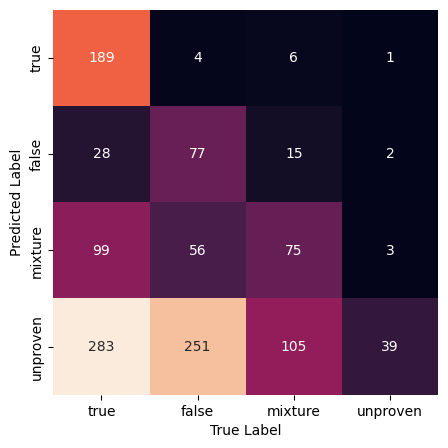

In [24]:

class_labels = ['true','false','mixture','unproven']
mat = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')